# CNN - MNIST

## Partie 1 : Base de données, Analyse et Préparation

Pour aborder cette problématique de la reconnaissance des chiffres, il est primordial d’avoir une DataSet. Pour cela, vous devez télécharger la Dataset MNIST (https://github.com/teavanist/MNIST-JPG).

Par la suite, il faut développer une boucle for pour lire les images et les charger sous forme un tenseur.

Outils :
- Import os
- Import cv2
- from sklearn.model\_selection import train\_test\_split
- os.listdir(chemin)
- cv2.cvtColor(img, cv2.COLOR\_GRAY2BGR) si besoin
- cv2.resize(img,(width,height), interpolation = cv2.INTER\_AREA) si besoin
- Data.append(image) – Label.append(classe)


In [1]:
import os
import cv2
from tqdm import tqdm

def import_data(rootFolderPath):
    data = []
    data_label = []
    total = 0
    
    for root, dirs, files in os.walk(rootFolderPath):
        print(root, dirs, len(files))
        label = os.path.basename(root)
        total += len(files)
        for file in files:
            path = root+os.sep+file
            img = cv2.imread(path)
            data.append(img)
            data_label.append(label)
            
    return(data, data_label)

data_test, data_test_label = import_data("."+os.sep+"Dataset"+os.sep+"testing")
data_train, data_train_label = import_data("."+os.sep+"Dataset"+os.sep+"training")

data_test_label = list(map(int, data_test_label))
data_train_label = list(map(int, data_train_label))

print(len(data_test))
print(len(data_test_label))
print(len(data_train))
print(len(data_train_label))

./Dataset/testing ['3', '5', '6', '1', '2', '7', '9', '4', '8', '0'] 0
./Dataset/testing/3 [] 1010
./Dataset/testing/5 [] 892
./Dataset/testing/6 [] 958
./Dataset/testing/1 [] 1135
./Dataset/testing/2 [] 1032
./Dataset/testing/7 [] 1028
./Dataset/testing/9 [] 1009
./Dataset/testing/4 [] 982
./Dataset/testing/8 [] 974
./Dataset/testing/0 [] 980
./Dataset/training ['3', '5', '6', '1', '2', '7', '9', '4', '8', '0'] 0
./Dataset/training/3 [] 6131
./Dataset/training/5 [] 5421
./Dataset/training/6 [] 5918
./Dataset/training/1 [] 6742
./Dataset/training/2 [] 5958
./Dataset/training/7 [] 6265
./Dataset/training/9 [] 5949
./Dataset/training/4 [] 5842
./Dataset/training/8 [] 5851
./Dataset/training/0 [] 5923
10000
10000
60000
60000


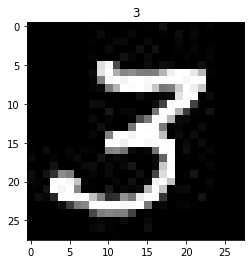

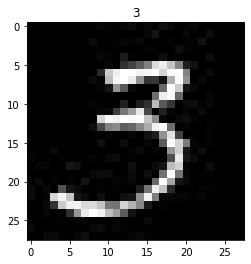

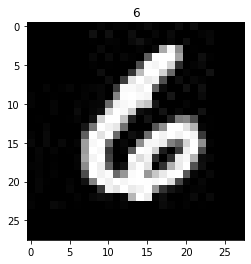

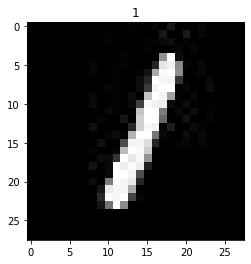

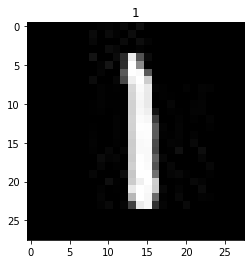

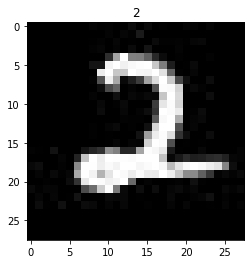

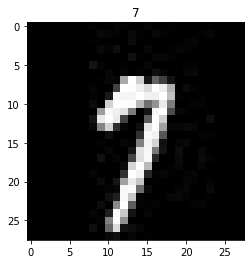

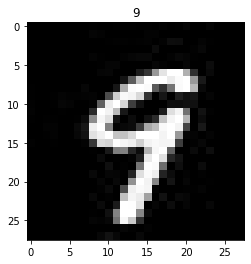

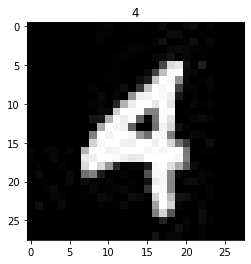

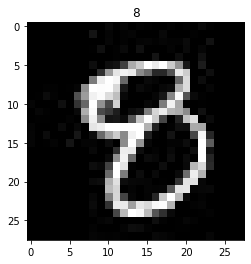

In [2]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

# Afficher 10 images pour vérifier la concordance image / label
for num in range(1, len(data_train), round(len(data_train)/10)):
    image = data_train[num]
    #Show the image with matplotlib
    plt.imshow(image)
    plt.title(data_train_label[num])
    plt.show()

## Partie 2 : Architecture CNN sur Tensorflow

Cette deuxième partie est réservée pour développer une architecture CNN sur tensorflow, et lancée par la suite l’apprentissage de CNN. Calculer l’accuracy et la matrice de confusion sur les données de test, commenter les performances obtenues. Outil : https://www.tensorflow.org/tutorials/images/cnn


### Importer TensorFlow

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

### Préparer le jeu de données

In [4]:
train_images = np.array(data_train)
train_labels = np.array(data_train_label)
test_images = np.array(data_test)
test_labels = np.array(data_test_label)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


#### Vérifier les données

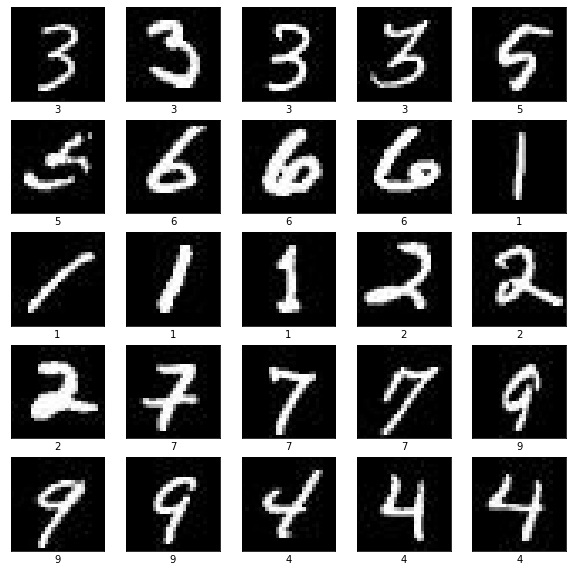

In [5]:
class_names = np.unique(np.concatenate([train_labels,test_labels]))

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i*2000])
    plt.xlabel(class_names[train_labels[i*2000].astype(int)])
plt.show()

### Créer la base convolutive

In [6]:
# Récupération du format de l'image dans la première image du dataset
input_shape = train_images[0].shape
input_shape

(28, 28, 3)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


2022-03-28 17:40:50.889604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 17:40:50.896419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-03-28 17:40:50.896441: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-03-28 17:40:50.897143: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

#### Ajouter des couches denses sur le dessus

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Compiler et entraîner le modèle

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1420 - accuracy: 0.9545 - val_loss: 0.0430 - val_accuracy: 0.9861
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0453 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0375 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0265 - val_accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0296 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.0366 - val_a

### Évaluer le modèle

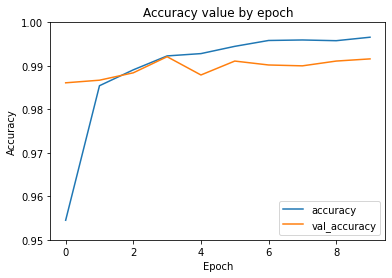

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.legend(loc='lower right')
plt.title("Accuracy value by epoch")
plt.show()

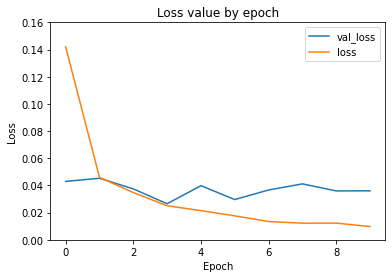

In [13]:
plt.plot(history.history['val_loss'], label = "val_loss")
plt.plot(history.history['loss'], label = "loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.ylim([0, 0.16])
plt.legend(loc = "upper right")
plt.title("Loss value by epoch")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc, test_loss)

313/313 - 1s - loss: 0.0360 - accuracy: 0.9916 - 647ms/epoch - 2ms/step
0.991599977016449 0.03604179993271828


In [15]:
# importing the library
import tensorflow as tf

y_prob = model.predict(test_images)
y_pred = y_prob.argmax(axis=-1)

# Initializing the input tensor
labels = y_pred
predictions = data_test_label
weights = None
 
# Printing the input tensor
#print('labels: ', labels)
#print('Predictions: ', predictions)
#print('Weights: ', weights)
 
# Evaluating confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels, predictions, weights=weights)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    0,    3,    3,    0,    3,    1],
       [   0, 1132,    1,    0,    0,    0,    2,    3,    0,    0],
       [   0,    0, 1027,    3,    0,    0,    1,    4,    2,    0],
       [   0,    0,    1, 1003,    0,    5,    0,    1,    1,    0],
       [   0,    0,    0,    0,  974,    0,    0,    0,    1,    3],
       [   0,    0,    0,    1,    0,  879,    0,    0,    0,    1],
       [   0,    1,    0,    0,    1,    3,  952,    0,    4,    0],
       [   1,    2,    3,    1,    0,    0,    0, 1016,    3,    0],
       [   0,    0,    0,    2,    0,    1,    0,    0,  951,    1],
       [   0,    0,    0,    0,    7,    1,    0,    4,    9, 1003]],
      dtype=int32)>

La matrice de confusion montre que la précision du modèle est bon : il y a une très grande corréaltion entre les données de tests et les résultats prédits.

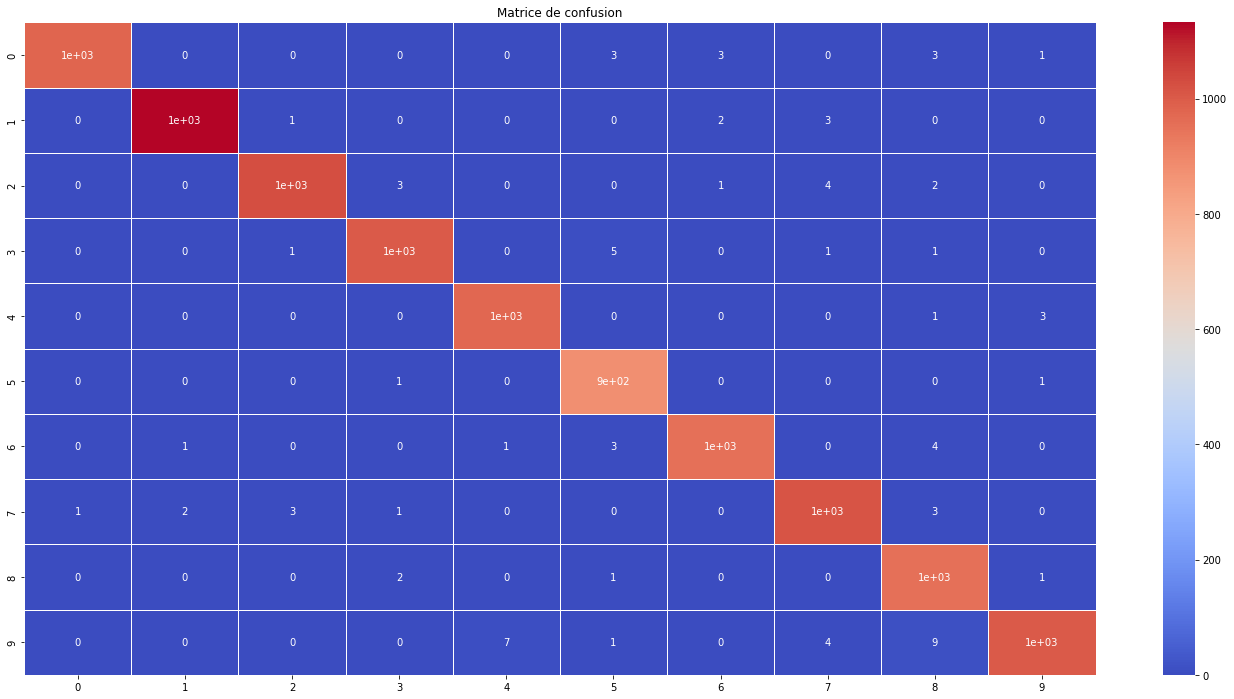

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt='.1g', cmap='coolwarm')
plt.title("Matrice de confusion")
plt.show()

### Sauvegarde du modèle

In [17]:
model.save('./model_CNN-Romain')

2022-03-28 17:43:15.114288: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model_CNN-Romain/assets



## Partie 3 : Tester l’efficacité du modèle

Nous cherchons à tester le modèle développer sur des nouvelles données. Pour un début, utiliser l’application Paint pour simuler des chiffres, et tester les performances de votre modèle sur les chiffres simulés.

Il sera intéressant de développer une application python pour reconnaitre automatiquement les chiffres en intégrant votre modèle CNN.

### Préparation

#### Import des bibliothèques

In [18]:
import tensorflow as tf

#### Import du modèle

In [19]:
model = tf.keras.models.load_model('./model_CNN-Romain')

#### Import de l'image à tester

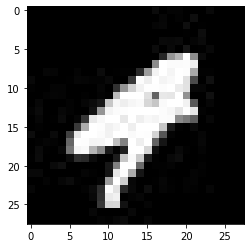

(1, 28, 28, 3)

In [20]:
input_image = cv2.imread("input_image.jpg")
plt.imshow(input_image)
plt.show()

image = np.expand_dims(np.array(input_image), axis=0)
image.shape

### Prédiction

In [21]:
prob = model.predict(image)

prediction = prob[0].argmax(axis = -1)
print("Prediction : ", prediction)

for n, p in enumerate(prob[0]):
    print(n, p)

Prediction :  4
0 -1691.8901
1 749.4379
2 -891.77
3 -2694.5103
4 3088.38
5 -2193.6553
6 -1024.4492
7 263.8215
8 -2662.6267
9 1435.909
